### How can we design and train an MLP neural network to predict customer churn based on historical usage patterns, demographic information, and other relevant features, with the aim of improving retention strategies for our business?

In [ ]:
# churn prediction is a methodology that involves the data-driven pinpointing of customer accounts that are at high risk of downgrading their engagement, canceling their subscription, or disengaging with your company. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('customer_churn.csv')
data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [3]:
from sklearn.utils import shuffle
data=shuffle(data)

In [4]:
data.shape

(900, 10)

In [5]:
data.size

9000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 549 to 349
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 77.3+ KB


In [7]:
data.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [8]:
data.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

<Figure size 800x800 with 0 Axes>

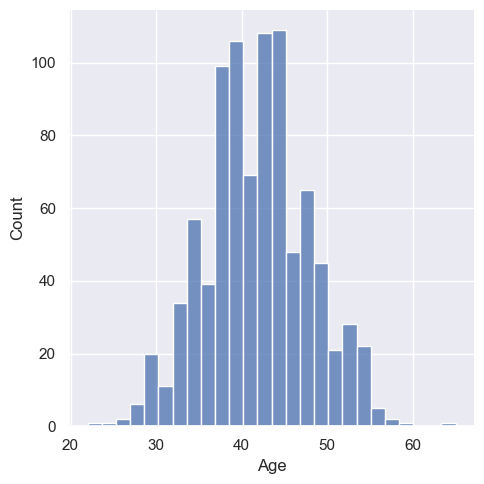

In [11]:
sns.set()
plt.figure(figsize=(8,8))
sns.displot(data['Age'])
plt.show()

<Figure size 800x800 with 0 Axes>

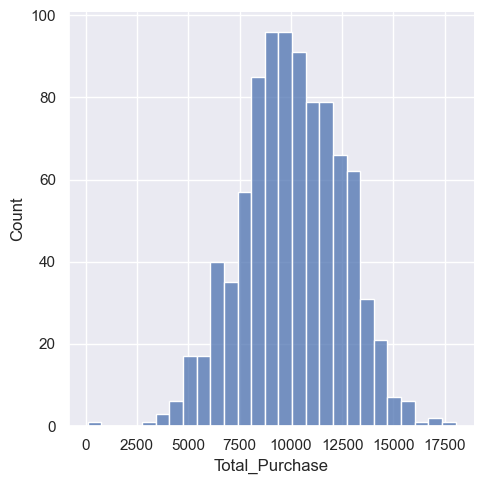

In [12]:
sns.set()
plt.figure(figsize=(8,8))
sns.displot(data['Total_Purchase'])
plt.show()

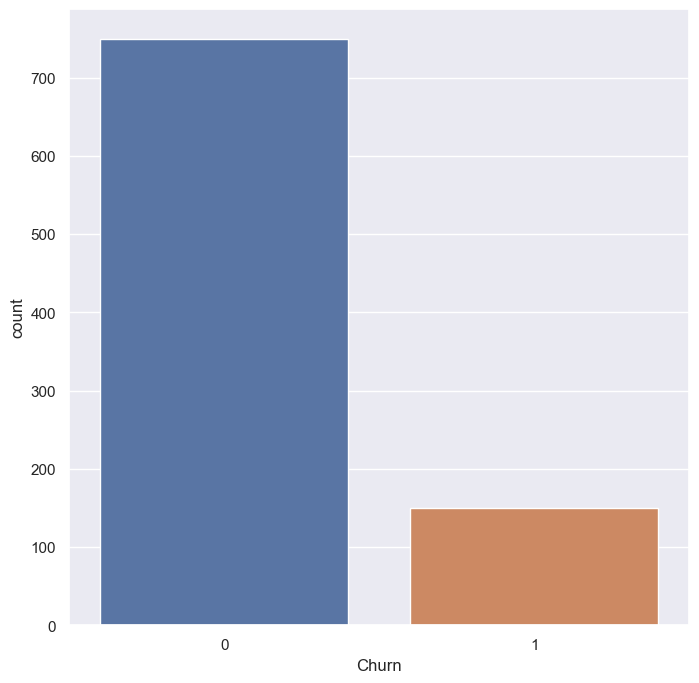

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(x='Churn',data=data)
plt.show()

In [14]:
#irrelevant columns like 'Names', 'Onboard_date', 'Location', 'Company'
data = data.drop(columns=['Names', 'Onboard_date', 'Location', 'Company'])

In [15]:
data.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
549,45.0,9852.25,1,4.55,8.0,0
73,37.0,11145.95,1,5.87,11.0,1
295,41.0,12008.34,1,4.94,7.0,0
119,46.0,12200.31,0,6.62,10.0,1
378,40.0,4762.81,1,5.12,10.0,0


In [16]:
x=data.drop(columns=['Churn'])
y=data['Churn']

In [17]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.51979958, -0.0874729 ,  1.03851911, -0.56774154, -0.33323478],
       [-0.78650303,  0.44993281,  1.03851911,  0.46857606,  1.36758544],
       [-0.13335172,  0.80817144,  1.03851911, -0.26155679, -0.90017485],
       ...,
       [ 0.84637523, -0.73563312, -0.96290958, -0.63054867, -0.90017485],
       [-0.13335172,  0.35599378, -0.96290958, -0.50493441, -0.33323478],
       [ 0.51979958, -0.42728844, -0.96290958,  1.26936694,  0.2337053 ]])

In [18]:
x.shape

(900, 5)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_val_scaled=scaler.transform(x_val)

In [21]:
print(len(x_train))
print(len(x_val))

576
144


In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
model=keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)   
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11137 (43.50 KB)
Trainable params: 11137 (43.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### Loss Function ('binary_crossentropy' in this case): Binary crossentropy is a common choice for binary classification problems, such as churn prediction. It measures the difference between the true labels and the predicted probabilities.

In [26]:
history=model.fit(x_train_scaled,y_train,validation_data=(x_val_scaled,y_val),epochs=50,batch_size=32,verbose=2)

Epoch 1/50


18/18 - 1s - loss: 0.8173 - accuracy: 0.8264 - val_loss: 0.3141 - val_accuracy: 0.8403 - 1s/epoch - 76ms/step
Epoch 2/50
18/18 - 0s - loss: 0.4458 - accuracy: 0.8524 - val_loss: 0.2765 - val_accuracy: 0.8819 - 129ms/epoch - 7ms/step
Epoch 3/50
18/18 - 0s - loss: 0.3883 - accuracy: 0.8646 - val_loss: 0.2696 - val_accuracy: 0.8819 - 119ms/epoch - 7ms/step
Epoch 4/50
18/18 - 0s - loss: 0.3694 - accuracy: 0.8767 - val_loss: 0.3492 - val_accuracy: 0.8958 - 124ms/epoch - 7ms/step
Epoch 5/50
18/18 - 0s - loss: 0.3572 - accuracy: 0.8854 - val_loss: 0.3605 - val_accuracy: 0.9028 - 143ms/epoch - 8ms/step
Epoch 6/50
18/18 - 0s - loss: 0.3490 - accuracy: 0.8802 - val_loss: 0.4278 - val_accuracy: 0.8889 - 149ms/epoch - 8ms/step
Epoch 7/50
18/18 - 0s - loss: 0.3456 - accuracy: 0.8906 - val_loss: 0.3399 - val_accuracy: 0.9028 - 93ms/epoch - 5ms/step
Epoch 8/50
18/18 - 0s - loss: 0.3384 - accuracy: 0.8889 - val_loss: 0.4215 - val_accuracy: 0.9028 - 64ms/epoch - 4ms/step
Epoch 9/50
18/18 -

In [27]:
loss=model.evaluate(x_val_scaled,y_val)
predictions=model.predict(x_val_scaled)

5/5 [==============================] - 0s 2ms/step


In [28]:
model.save('minstmodel2.keras')